`page 371`

# Chapter 9

## Exercise 7

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

import statsmodels.api as sm

In [2]:
auto = sm.datasets.get_rdataset('Auto', package='ISLR').data
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
# calculate median mpg
median_mpg = np.median(auto['mpg'])

# create into a binary variable
#auto['mpg'].map(lambda x: 1 if x > median_mpg else 0)    This is one way of doing with lambda
auto['mpg'] = np.where(auto['mpg'] > median_mpg, 1, 0)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
# drop the name column
auto.drop('name', axis=1, inplace=True)

In [15]:
# feature sets
X = auto.drop('mpg', axis=1)
y = auto['mpg']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [176]:
# fit SVC
svc = SVC(kernel='linear', random_state=1)

# define values for the cost parameter C
cost = {'C': 10**np.arange(-3, 1, 0.2)}

# initialize CV instance
classifier = GridSearchCV(svc, param_grid=cost, cv=5, scoring='accuracy', iid=False, return_train_score=False)

# fit to data
classifier.fit(X, y)

# best param chosen
classifier.best_params_

{'C': 0.001}

In [178]:
# Mean test score
np.mean(classifier.cv_results_['mean_test_score'])

0.8763525641025641

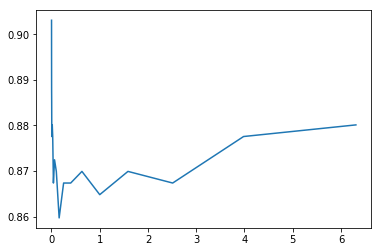

In [135]:
# import masked array class from Numpy
import numpy.ma as ma

# get the C values from the masked array param_C
plt.plot(ma.getdata(classifier.cv_results_['param_C']), classifier.cv_results_['mean_test_score'])

Could've simply done `GridSearchCV` on training data and then predicted like below using the `classifier`. This is also recommended approach in Sklearn's [user guide](https://devdocs.io/scikit_learn/modules/grid_search#grid-search).

In [140]:
# Now use a validation set approach to get confusion matrix
svc = SVC(C=0.001, kernel='linear').fit(X_train, y_train)

# predictions
y_pred = svc.predict(X_test)

# confusion matrix with mpg < median is 0 and mpg > median is 1
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc.classes_, columns=svc.classes_)

,0,1
0,45,9
1,3,41


In [144]:
# R2 score
svc.score(X_test, y_test)

0.9251700680272109

In [148]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        54
           1       0.82      0.93      0.87        44

   micro avg       0.88      0.88      0.88        98
   macro avg       0.88      0.88      0.88        98
weighted avg       0.88      0.88      0.88        98



#### **SVC with Radial Basis Factor**

In [194]:
# Now use a validation set approach to get confusion matrix
svc_radial = SVC(kernel='rbf')

# define values for the cost parameter C
param_grid = {'C': 10**np.arange(-3, 1, 0.2),
       'gamma': 10**np.arange(-1, 1, 0.1)}

# initialize CV instance
classifier = GridSearchCV(svc_radial, param_grid=param_grid, cv=5, scoring='accuracy', iid=False)

# fit to data
classifier.fit(X_train, y_train)

# best param chosen
classifier.best_params_

{'C': 1.0000000000000062, 'gamma': 0.1}

In [188]:
classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [195]:
# mean accuracy across test sets in CV
np.mean(classifier.cv_results_['mean_test_score'])

0.5191247126436781

In [197]:
# predictions
y_pred = classifier.predict(X_test)

# confusion matrix with mpg < median is 0 and mpg > median is 1
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classifier.classes_, columns=classifier.classes_)
cm.index.name = 'Predicted'
cm.columns.name= 'True'
cm

True,0,1
Predicted,,
0,1,53
1,0,44


#### **SVM with polynomial basis**

**Note to self**: This here below never finished.

In [ ]:
# Now use a validation set approach to get confusion matrix
svc_poly = SVC(kernel='poly')

# define values for the cost parameter C
param_grid = {'C': 10**np.arange(-3, 1, 0.2),
            'gamma': 10**np.arange(-1, 1, 0.1),
             'degree': np.arange(1, 11, 1)}

# initialize CV instance
classifier = GridSearchCV(svc_poly, param_grid=param_grid, cv=5, scoring='accuracy', iid=False)

# fit to data
classifier.fit(X_train, y_train)

# best param chosen
classifier.best_params_

In [206]:
# predictions
y_pred = classifier.predict(X_test)

# confusion matrix with mpg < median is 0 and mpg > median is 1
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classifier.classes_, columns=classifier.classes_)
cm.index.name = 'Predicted'
cm.columns.name= 'True'
cm

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## $Fin$